Post here: https://www.datacamp.com/community/tutorials/finance-python-trading#gs.tFflO8w

GitHub: https://github.com/datacamp/datacamp-community-tutorials/blob/master/Python%20Finance%20Tutorial%20For%20Beginners/Python%20For%20Finance%20Beginners%20Tutorial.ipynb


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (14, 6)

In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

yf.pdr_override() # to override pandas_datareader.data.get_data_yahoo() method

C:\Anaconda3\lib\site-packages\fix_yahoo_finance\__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and no longer available.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


In [3]:
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 11, 1))
aapl.head()

[*********************100%***********************]  1 of 1 downloaded

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,9.621180,178159800
2006-10-03,10.635715,10.707143,10.455714,10.582857,9.520932,197677200
2006-10-04,10.585714,10.780000,10.451428,10.768572,9.688010,207270700
2006-10-05,10.647142,10.880000,10.590000,10.690000,9.617326,170970800
2006-10-06,10.631429,10.720000,10.544286,10.602858,9.538924,116739700


C:\Anaconda3\lib\site-packages\dateutil\rrule.py:452: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


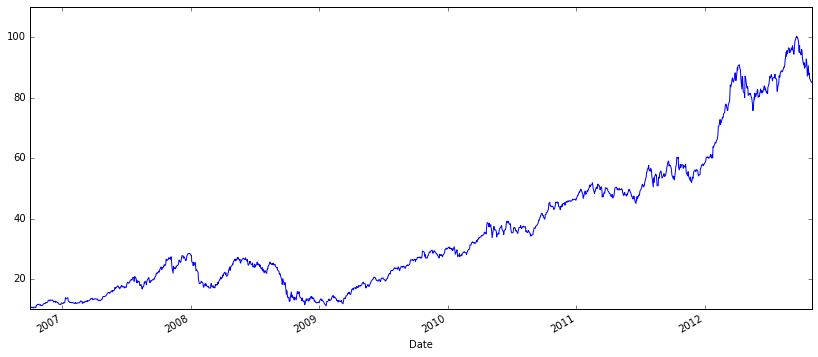

In [5]:
aapl.Close.plot()

In [6]:
import quandl

In [7]:
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")

aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


In [8]:
# data from csv
aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", 
                   header=0, index_col= 0, 
                   names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

aapl.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-02,75.10,75.87,74.30,74.860001,178159800.0,10.694285
2006-10-03,74.45,74.95,73.19,74.080002,197677200.0,10.582857
2006-10-04,74.10,75.46,73.16,75.380005,207270700.0,10.768572
2006-10-05,74.53,76.16,74.13,74.829994,170970800.0,10.690000
2006-10-06,74.42,75.04,73.81,74.220001,116739700.0,10.602858


In [9]:
aapl.index

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=1323, freq=None)

In [10]:
aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [11]:
# select only the last 10 observations of Close

ts = aapl.Close[-10:]
ts

2011-12-16    381.019989
2011-12-19    382.209991
2011-12-20    395.950012
2011-12-21    396.450012
2011-12-22    398.549988
2011-12-23    403.330017
2011-12-27    406.529999
2011-12-28    402.640015
2011-12-29    405.119995
2011-12-30    405.000000
Name: Close, dtype: float64

In [12]:
type(ts)

pandas.core.series.Series

In [13]:
# inspect the first rows of november-december 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.282857
2006-11-03  79.36  79.53  77.79  78.290001  107972200.0  11.184286
2006-11-06  78.95  80.06  78.43  79.709999  108644200.0  11.387143
2006-11-07  80.45  81.00  80.13  80.510002  131483100.0  11.501429


In [14]:
# inspect the first rows of 2007
aapl.loc['2007'].head()

,Open,High,Low,Close,Volume,Adj Close
2007-01-03,86.29,86.58,81.90,83.800003,309579900.0,11.971429
2007-01-04,84.05,85.95,83.82,85.659996,211815100.0,12.237143
2007-01-05,85.77,86.20,84.40,85.049995,208685400.0,12.150000
2007-01-08,85.96,86.53,85.28,85.470001,199276700.0,12.210000
2007-01-09,86.45,92.98,85.15,92.570000,837324600.0,13.224286


In [15]:
# inspect november 2006
aapl.iloc[22:43]

,Open,High,Low,Close,Volume,Adj Close
2006-11-01,81.10,81.38,78.36,79.160004,152798100.0,11.308572
2006-11-02,78.92,79.32,78.50,78.979996,116370800.0,11.282857
2006-11-03,79.36,79.53,77.79,78.290001,107972200.0,11.184286
2006-11-06,78.95,80.06,78.43,79.709999,108644200.0,11.387143
2006-11-07,80.45,81.00,80.13,80.510002,131483100.0,11.501429
2006-11-08,80.02,82.69,79.89,82.449997,172729200.0,11.778571
2006-11-09,82.90,84.69,82.12,83.339996,230763400.0,11.905714
2006-11-10,83.55,83.60,82.50,83.120003,93466100.0,11.874286
2006-11-13,83.22,84.45,82.64,84.349998,112668500.0,12.050000
2006-11-14,84.80,85.00,83.90,85.000000,147238700.0,12.142858


In [16]:
# inspect the Open and Close values at 2006-11-01 and 2006-12-01
aapl.iloc[[22, 43], [0, 3]]

,Open,Close
2006-11-01,81.1,79.160004
2006-12-01,91.8,91.320000


In [17]:
# sample 20 rows
sample = aapl.sample(20)
sample

,Open,High,Low,Close,Volume,Adj Close
2011-12-23,399.69,403.59,399.49,403.330017,67349800.0,57.618572
2009-11-20,199.15,200.39,197.76,199.919998,101666600.0,28.559999
2007-06-19,124.69,125.01,122.91,123.660004,235756500.0,17.665714
2008-02-11,128.01,129.98,127.20,129.449997,300358100.0,18.492857
2009-02-11,96.37,98.31,95.77,96.820000,168743400.0,13.831429
2006-10-09,73.80,75.08,73.53,74.629997,109555600.0,10.661428
2010-11-17,301.20,303.99,297.76,300.500000,119862400.0,42.928570
2009-10-07,189.76,190.55,189.03,190.250000,116417000.0,27.178572
2007-09-20,140.15,141.79,139.32,140.309998,172960200.0,20.044285
2011-04-06,341.22,343.90,337.14,338.039978,100634800.0,48.291428


In [18]:
# resample to monthly level
monthly_aapl = aapl.resample('M').mean()
monthly_aapl.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-31,77.020455,77.866364,76.251818,77.125909,1.634995e+08,11.017987
2006-11-30,85.130952,86.202381,84.202857,85.344762,1.647010e+08,12.192109
2006-12-31,86.911000,87.825500,85.439000,86.471500,2.111349e+08,12.353071
2007-01-31,89.056500,90.166000,87.658000,88.881499,3.401223e+08,12.697357
2007-02-28,85.764737,86.680526,84.782632,85.727895,1.805573e+08,12.246842


In [19]:
# daily returns
daily_returns = aapl.Close.pct_change()

# replace NaN values with 0
daily_returns.fillna(0, inplace=True)

daily_returns.head()

2006-10-02    0.000000
2006-10-03   -0.010419
2006-10-04    0.017549
2006-10-05   -0.007297
2006-10-06   -0.008152
Name: Close, dtype: float64

In [20]:
daily_log_returns = np.log(daily_returns + 1)
daily_log_returns.head()

2006-10-02    0.000000
2006-10-03   -0.010474
2006-10-04    0.017396
2006-10-05   -0.007323
2006-10-06   -0.008185
Name: Close, dtype: float64

In [21]:
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-02,75.10,75.87,74.30,74.860001,178159800.0,10.694285
2006-10-03,74.45,74.95,73.19,74.080002,197677200.0,10.582857
2006-10-04,74.10,75.46,73.16,75.380005,207270700.0,10.768572
2006-10-05,74.53,76.16,74.13,74.829994,170970800.0,10.690000
2006-10-06,74.42,75.04,73.81,74.220001,116739700.0,10.602858


In [22]:
# resample dataframe to business months, take last observation as value
monthly_aapl_last = aapl.resample('BM').apply(lambda x: x[-1])

# montly percentage change
monthly_aapl_last.pct_change()

# resample 'aapl' to quarters, take the mean as value per quarter
quarter = aapl.resample('4M').mean()

# quarterly returns
quarterly_returns = quarter.pct_change().fillna(0)
quarterly_returns.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-28,0.125777,0.126451,0.121460,0.122860,0.369611,0.122860
2007-06-30,0.196030,0.195413,0.198331,0.197735,-0.080296,0.197735
2007-10-31,0.400961,0.404613,0.392010,0.400796,0.306882,0.400796
2008-02-29,0.127066,0.130711,0.117746,0.120394,0.172293,0.120394


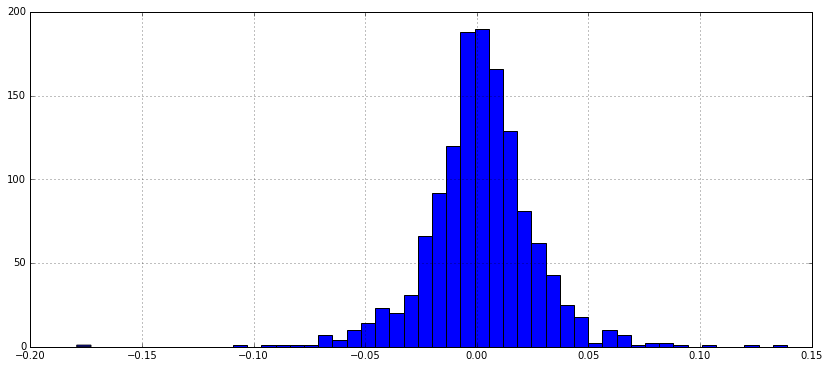

In [23]:
daily_returns.hist(bins=50)
plt.show()

In [24]:
daily_returns.describe()

count    1323.000000
mean        0.001565
std         0.023983
min        -0.179195
25%        -0.010661
50%         0.001646
75%         0.014285
max         0.139050
Name: Close, dtype: float64

C:\Anaconda3\lib\site-packages\dateutil\rrule.py:452: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


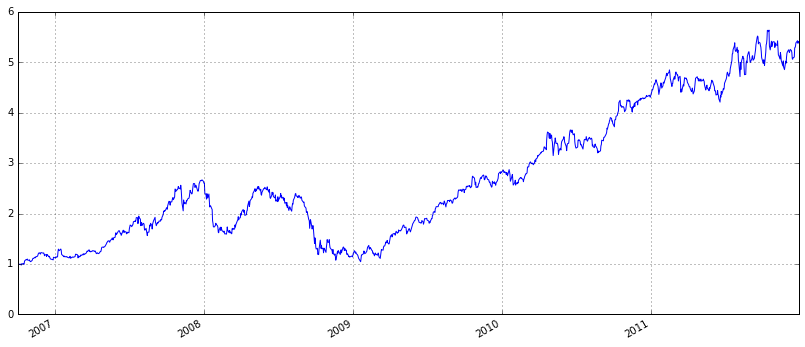

In [25]:
cum_daily_return = (1 + daily_returns).cumprod()
cum_daily_return.plot(grid=True);

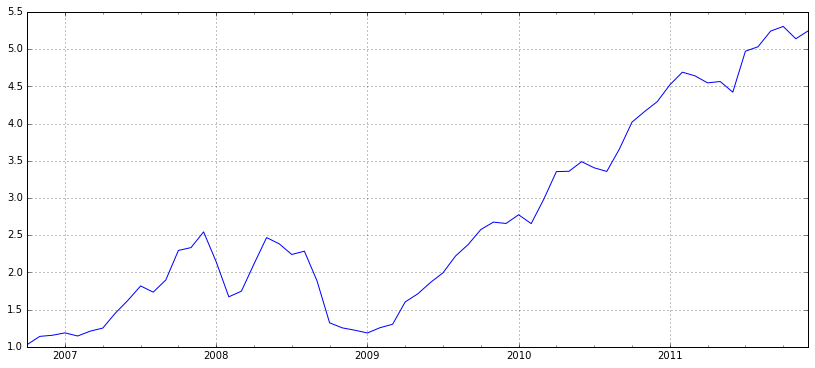

In [26]:
# montly cum returns

cum_monthly_returns = cum_daily_return.resample('M').mean()
cum_monthly_returns.plot(grid=True);

In [27]:
def get(tickers, start_date, end_date):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=start_date, end=end_date))
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [28]:
tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

[*********************100%***********************]  1 of 1 downloaded

In [39]:
all_data.head()

Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2006-10-02  10.728572  10.838572  10.614285  10.694285   9.621180   
       2006-10-03  10.635715  10.707143  10.455714  10.582857   9.520932   
       2006-10-04  10.585714  10.780000  10.451428  10.768572   9.688010   
       2006-10-05  10.647142  10.880000  10.590000  10.690000   9.617326   
       2006-10-06  10.631429  10.720000  10.544286  10.602858   9.538924   

                      Volume  
Ticker Date                   
AAPL   2006-10-02  178159800  
       2006-10-03  197677200  
       2006-10-04  207270700  
       2006-10-05  170970800  
       2006-10-06  116739700

In [41]:
all_data.tail()

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
GOOG   2011-12-23  313.958008  315.289337  313.242645  314.524323  314.524323   
       2011-12-27  313.982849  320.162659  313.958008  318.056335  318.056335   
       2011-12-28  319.298279  320.416016  316.988312  317.783142  317.783142   
       2011-12-29  318.672333  319.422455  315.547668  319.124390  319.124390   
       2011-12-30  318.935638  321.290314  318.935638  320.863098  320.863098   

                    Volume  
Ticker Date                 
GOOG   2011-12-23  2926200  
       2011-12-27  3233700  
       2011-12-28  4281900  
       2011-12-29  3171200  
       2011-12-30  3587600

In [50]:
daily_close_px = all_data[['Adj Close']].reset_index()
daily_close_px.head()

,Ticker,Date,Adj Close
0,AAPL,2006-10-02,9.621180
1,AAPL,2006-10-03,9.520932
2,AAPL,2006-10-04,9.688010
3,AAPL,2006-10-05,9.617326
4,AAPL,2006-10-06,9.538924


In [56]:
# Isolate the `Adj Close` values and transform the DataFrame

daily_close_px = all_data[['Adj Close']].reset_index().pivot(
    'Date', 'Ticker', 'Adj Close')
daily_close_px.head()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2006-10-02,9.621180,199.422943,63.914127,21.076475
2006-10-03,9.520932,200.714539,63.742378,21.084181
2006-10-04,9.688010,206.506866,64.874352,21.523273
2006-10-05,9.617326,204.574448,64.733810,21.507868
2006-10-06,9.538924,208.891357,64.905571,21.469353


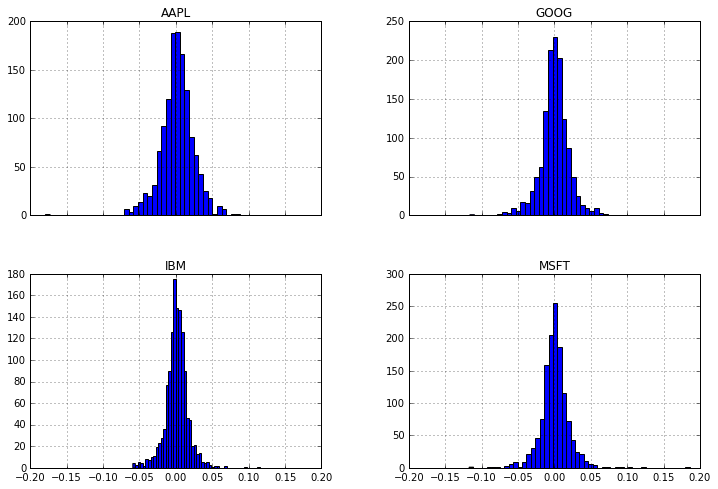

In [61]:
# Calculate the daily percentage change for 'daily_close_px'
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12, 8));

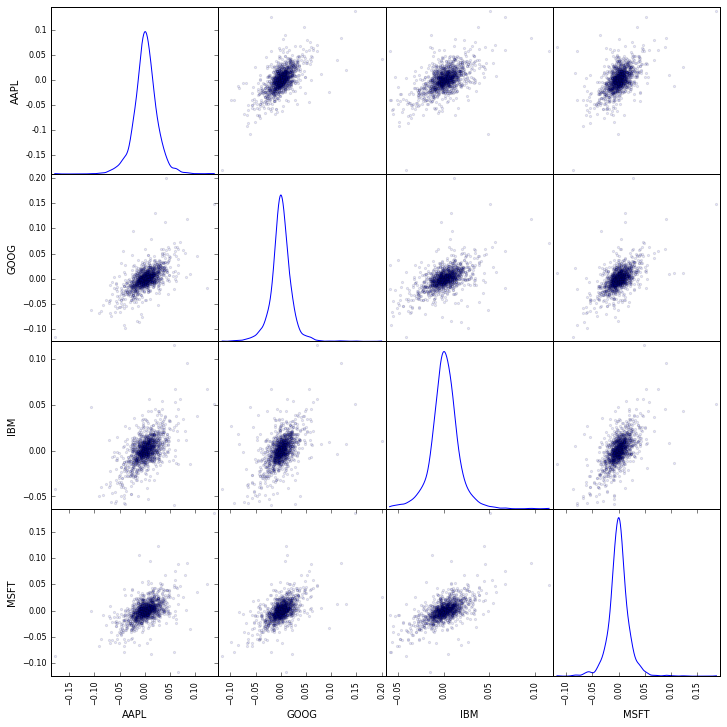

In [65]:
# Plot a scatter matrix with the 'daily_pct_change' data
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12, 12));

### Moving windows

In [68]:
# Isolate the adjusted closing prices
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

moving_avg.tail()

2011-12-23    55.439643
2011-12-27    55.445286
2011-12-28    55.437643
2011-12-29    55.468393
2011-12-30    55.495500
Name: Adj Close, dtype: float64

C:\Anaconda3\lib\site-packages\dateutil\rrule.py:452: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


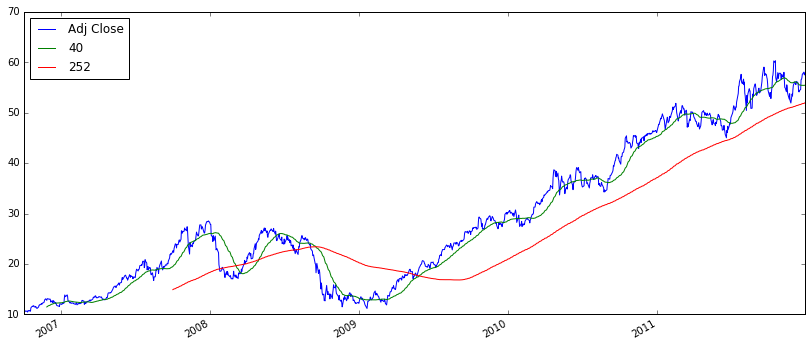

In [71]:
# Short period moving average
aapl['40'] = adj_close_px.rolling(window=40).mean()

# Long period moving average
aapl['252'] = adj_close_px.rolling(window=252).mean()


aapl[['Adj Close', '40', '252']].plot();

### Volatility calculation

C:\Anaconda3\lib\site-packages\dateutil\rrule.py:452: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2006-10-04,0.171268,0.137060,0.125204,0.125292
2006-10-05,0.132722,0.166289,0.100952,0.105108
2006-10-06,0.113897,0.146074,0.082735,0.093579
2006-10-09,0.102940,0.130662,0.075886,0.089911
2006-10-10,0.099181,0.134687,0.068655,0.081500


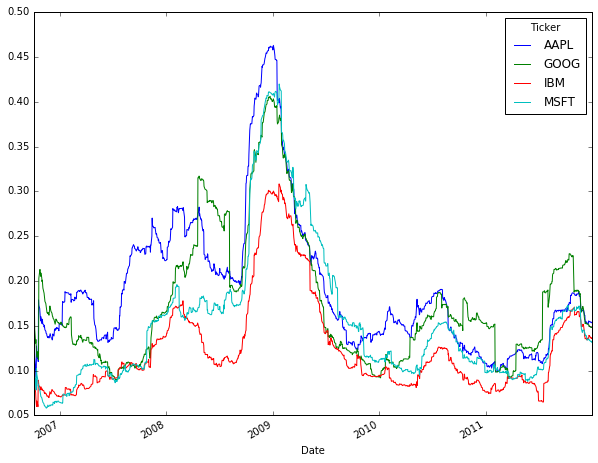

In [99]:
# Define the minimum of periods to consider
window = 75

min_periods = 0

# Calculate the volatility
vol = daily_pct_change.rolling(window=window, min_periods=min_periods).std() * np.sqrt(window)

vol.plot(figsize=(10, 8));

vol.dropna().head()

C:\Anaconda3\lib\site-packages\dateutil\rrule.py:452: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2007-01-22,0.187013,0.148344,0.080966,0.073138
2007-01-23,0.187172,0.148421,0.080851,0.073134
2007-01-24,0.186774,0.151292,0.079345,0.071206
2007-01-25,0.186679,0.152825,0.079230,0.074529
2007-01-26,0.186797,0.152266,0.079280,0.074555


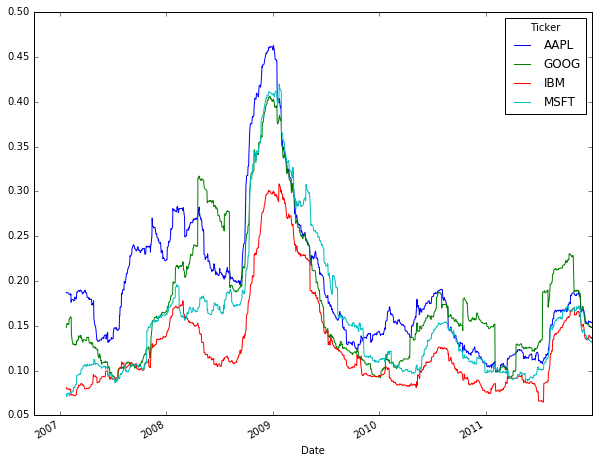

In [98]:
# Define the minimum of periods to consider
window = 75

min_periods = 1

# Calculate the volatility
vol = daily_pct_change.rolling(window=window).std() * np.sqrt(window)

vol.plot(figsize=(10, 8));

vol.dropna().head()

### Ordinary Least-Squares Regression (OLS)

In [101]:
import statsmodels.api as sm

from pandas import tseries

In [124]:
# Create dataframe from adjusted close price
all_adj_close = all_data[['Adj Close']]

all_adj_close.head()


# Calculate the returns
all_returns = np.log(all_adj_close.pct_change() + 1)


# isolate the AAPL returns
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)
return_data.columns = ['AAPL', 'MSFT']
return_data = return_data.iloc[1:]


# Add a constant
X = sm.add_constant(return_data.AAPL)

# construct the model
model = sm.OLS(return_data.MSFT, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Sat, 30 Sep 2017   Prob (F-statistic):           1.33e-96
Time:                        19:11:26   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.263        -0.001     0.000
AAPL           0.4407      0.019     22.704      0.000         0.403     0.479
==============================================================================
Omnibus:                      268.594   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7029.498
Skew:                          -0.211   Prob(JB):                         0.00
Kurtosis:                      14.289   Cond. No.                         41.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
print(model.params)

const   -0.000523
AAPL     0.440669
dtype: float64


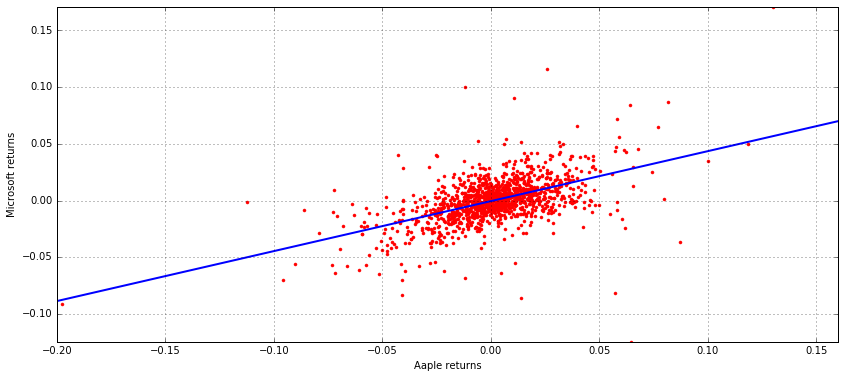

In [133]:
plt.plot(return_data.AAPL, return_data.MSFT, 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Aaple returns')
plt.ylabel('Microsoft returns');

C:\Anaconda3\lib\site-packages\dateutil\rrule.py:452: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


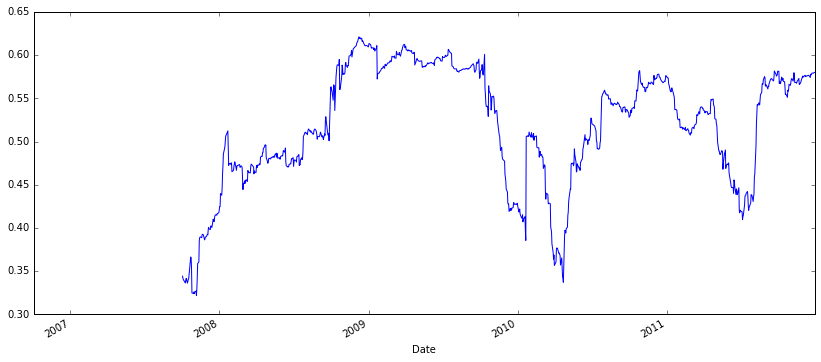

In [135]:
return_data.MSFT.rolling(window=252).corr(return_data.AAPL).plot();

### Building a Trading Strategy with Python

In [262]:
short_period = 60
long_period = 120

signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0
signals['Close'] = aapl.Close

# create short period sma
signals['short_mavg'] = aapl.Close.rolling(window=short_period, min_periods=1,
                                          center=False).mean()

# create long period sma
signals['long_mavg'] = aapl.Close.rolling(window=long_period, min_periods=1,
                                          center=False).mean()

# Create signals
signals['signal'][short_period:] = np.where(signals['short_mavg'][short_period:] >
                             signals['long_mavg'][short_period:], 1, 0)

# Generate trading orders
signals['orders'] = signals.signal.diff()

signals.head()

,signal,Close,short_mavg,long_mavg,orders
2006-10-02,0.0,74.860001,74.860001,74.860001,NaN
2006-10-03,0.0,74.080002,74.470001,74.470001,0.0
2006-10-04,0.0,75.380005,74.773336,74.773336,0.0
2006-10-05,0.0,74.829994,74.787500,74.787500,0.0
2006-10-06,0.0,74.220001,74.674001,74.674001,0.0


C:\Anaconda3\lib\site-packages\dateutil\rrule.py:452: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


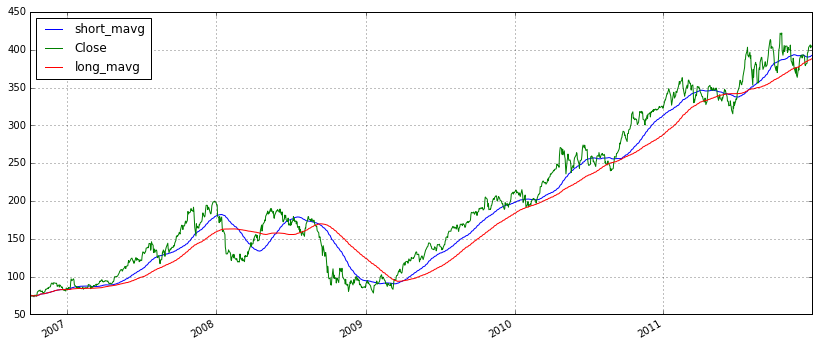

In [264]:
signals[['short_mavg', 'Close', 'long_mavg']].iloc[:].plot(grid=True);

C:\Anaconda3\lib\site-packages\dateutil\rrule.py:452: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


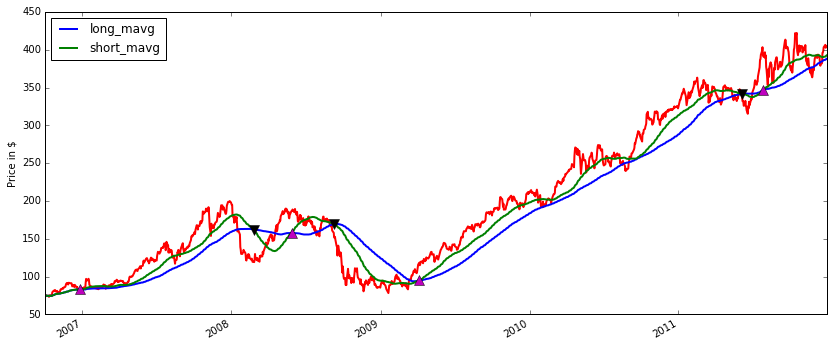

In [288]:
# initialize the plot figure
fig = plt.figure()

# add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price in $')

# plot the closing price
aapl.Close.plot(ax=ax1, color='r', lw=2)

# plot the short and long moving averages
signals[['long_mavg', 'short_mavg']].plot(ax=ax1, lw = 2)

# plot the buy signals
ax1.plot(signals.loc[signals.orders == 1].index, 
         signals.short_mavg[signals.orders == 1],
         '^', markersize=10, color='m')

# plot the sell signals
ax1.plot(signals.loc[signals.orders == -1].index, 
         signals.short_mavg[signals.orders == -1],
         'v', markersize=10, color='k')

plt.show()

### Backtesting the strategy

In [357]:
signals.tail()

,signal,Close,short_mavg,long_mavg,orders
2011-12-23,1.0,403.330017,390.608667,386.361751,0.0
2011-12-27,1.0,406.529999,391.028834,386.772834,0.0
2011-12-28,1.0,402.640015,391.496167,387.130584,0.0
2011-12-29,1.0,405.119995,392.039834,387.556584,0.0
2011-12-30,1.0,405.000000,392.485667,387.983668,0.0


C:\Anaconda3\lib\site-packages\dateutil\rrule.py:452: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)


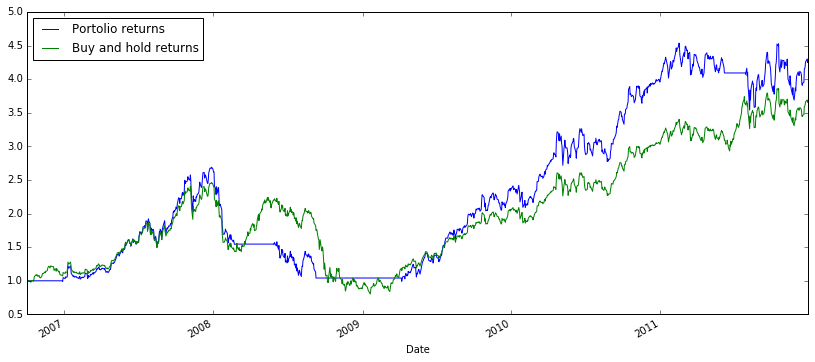

In [363]:
# not a good analysis. It should be possible to scale the position according to available cash
# but I don't know how


# set the initial capital 
initial_capital = 1000

# create a dataframe 'positions'
positions = pd.DataFrame(index=signals.index).fillna(0)

positions['AAPL'] = signals.signal * 100

# store the differences in shares owned
pos_diff = positions.diff()

# add 'holdings' to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0))

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).cumsum() 


# add 'total' to portfolio
portfolio['total'] = portfolio.cash + portfolio.holdings

# add 'returns' to portfolio
portfolio['returns'] = portfolio.total.pct_change()



# Plot the portfolio returns vs a buy-and-hold strategy
fig, ax = plt.subplots()


(portfolio.returns + 1).cumprod().plot(ax = ax);
(aapl_returns + 1).cumprod().plot(ax = ax, legend=False);

ax.legend(['Portolio returns', 'Buy and hold returns'], loc=0)

plt.show()

